In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
df = pd.read_csv("/content/drive/MyDrive/task data set/phone_tweets.csv")
df.head()

,Unnamed: 0,phone name,date,username,tweet,language,replies_count,retweets_count,likes_count,hashtags,link
0,0,realme c11 2021,2021-10-31,flipkartsupport,Sorry for the experience. We'll surely help y...,en,1.0,0.0,0.0,[],https://twitter.com/flipkartsupport/status/145...
1,1,realme c11 2021,2021-10-23,realmecarein,"Hi Ravinder, we would like to inform you that...",en,1.0,0.0,0.0,[],https://twitter.com/realmecareIN/status/145185...
2,2,realme c11 2021,2021-10-13,flipkartsupport,"However, the product realme C11 2021 (Cool Bl...",en,1.0,0.0,0.0,[],https://twitter.com/flipkartsupport/status/144...
3,3,realme c11 2021,2021-10-10,flipkartsupport,We understand your concern about the delivery...,en,1.0,0.0,0.0,[],https://twitter.com/flipkartsupport/status/144...
4,4,realme c11 2021,2021-09-18,wahinya_charlie,Need a phone and you're on a budget🤔 Get the ...,en,0.0,3.0,4.0,"['realmec112021', 'realmeatcarrefour']",https://twitter.com/Wahinya_Charlie/status/143...


In [3]:
df = df[df['language'] == 'en'].copy()

In [4]:
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = text.lower()
    return text

In [5]:
df["clean_tweet"] = df["tweet"].apply(clean_tweet)
df[["tweet", "clean_tweet"]].head()

,tweet,clean_tweet
0,Sorry for the experience. We'll surely help y...,sorry for the experience well surely help you...
1,"Hi Ravinder, we would like to inform you that...",hi ravinder we would like to inform you that ...
2,"However, the product realme C11 2021 (Cool Bl...",however the product realme c cool blue gb w...
3,We understand your concern about the delivery...,we understand your concern about the delivery...
4,Need a phone and you're on a budget🤔 Get the ...,need a phone and youre on a budget get the at...


In [6]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["compound_score"] = df["clean_tweet"].apply(lambda x: sid.polarity_scores(x)["compound"])
df["sentiment"] = df["compound_score"].apply(get_sentiment)

df[["clean_tweet", "compound_score", "sentiment"]].head()

,clean_tweet,compound_score,sentiment
0,sorry for the experience well surely help you...,0.8750,Positive
1,hi ravinder we would like to inform you that ...,0.7537,Positive
2,however the product realme c cool blue gb w...,0.7964,Positive
3,we understand your concern about the delivery...,0.7579,Positive
4,need a phone and youre on a budget get the at...,0.0000,Neutral


/tmp/ipython-input-7-998635673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="coolwarm")


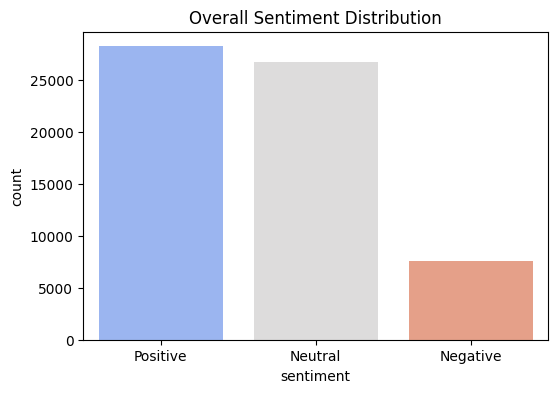

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment", palette="coolwarm")
plt.title("Overall Sentiment Distribution")
plt.show()

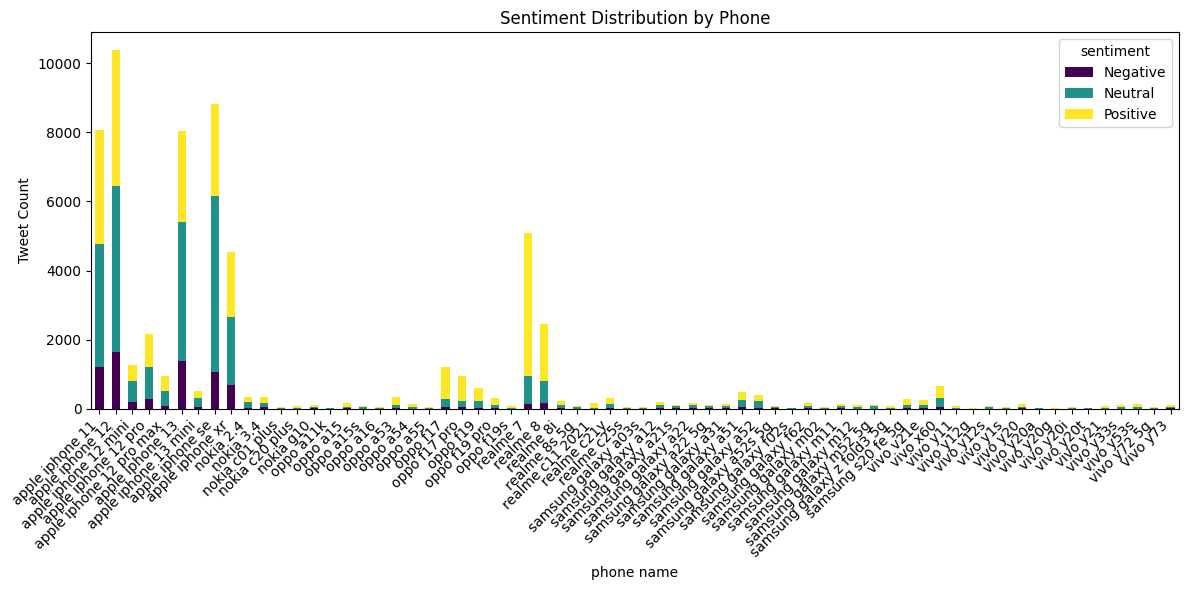

In [8]:
sentiment_by_phone = df.groupby(["phone name", "sentiment"]).size().unstack().fillna(0)
sentiment_by_phone.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Sentiment Distribution by Phone")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
top_positive = df[df["sentiment"] == "Positive"].sort_values(by="likes_count", ascending=False).head(5)
top_positive[["phone name", "clean_tweet", "likes_count", "link"]]

,phone name,clean_tweet,likes_count,link
58650,apple iphone 11,ok so what if apple just calls reverse wireles...,32509.0,https://twitter.com/MKBHD/status/1171135270412...
58808,apple iphone 11,i expect iphone and pro camera per phone mu...,28364.0,https://twitter.com/MKBHD/status/1169685169017...
2400,oppo f19 pro,were giving away oppo f pro g amp oppo bands...,17452.0,https://twitter.com/OPPOIndia/status/136737299...
51229,oppo f19,were giving away oppo f pro g amp oppo bands...,17452.0,https://twitter.com/OPPOIndia/status/136737299...
50750,oppo f19,thanks to maria has now become the favourite ...,16154.0,https://twitter.com/OPPOIndia/status/140577042...


In [10]:
df.to_csv("sentiment_analysis_output.csv", index=False)
print("Saved output to sentiment_analysis_output.csv")

Saved output to sentiment_analysis_output.csv
